<a href="https://colab.research.google.com/github/MUmairAB/Multilingual-Text-Summarization-Model-using-HuggingFace-Transformers/blob/main/Code%3A%20Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Summarization

Text summarization is an essential Natural Language Processing (NLP) task that aims to create concise and coherent summaries of long documents or articles. The objective is to extract the most critical information and main ideas while preserving the context and meaning of the original text.

In this notebook, we'll fine-tune a multilingual [mT5 model](https://huggingface.co/google/mt5-base) on [Multilingual Amazon Reviews Dataset](https://huggingface.co/datasets/amazon_reviews_multi).


In [1]:
#Install th etransformers library
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.9 MB/s eta 0:00:00


In [2]:
#Install the datasets library
!pip install --upgrade datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00


In [3]:
#Import the necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#Set the seed value
SEED = 4243

In [5]:
#Load the data
from datasets import load_dataset

english_dataset = load_dataset("amazon_reviews_multi", "en")
spanish_dataset = load_dataset("amazon_reviews_multi", "es")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [6]:
#View the data fields of English data
english_dataset

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

In [7]:
#View the data fields of Spanish data
spanish_dataset

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

##

In [8]:
#Define a function to interview the data / have a look at some random samples
def print_random_samples(dataset, num_samples=3):

  #Extrect the samples ffrom the dataset
  samples = dataset["train"].shuffle(SEED).select(range(num_samples))

  #Print the extracted sample
  for sample in samples:
    print("Title:",sample["review_title"])
    print("Review:",sample["review_body"])
    print("\n\t\t\t%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%\n")

In [9]:
#Print some English samples
print_random_samples(english_dataset)

Title: Short bulb life
Review: The bulb went out after one year of operation. It worked great before that.

			%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Title: Adds a nice, clean textured look and feel to cabinets and drawers
Review: I ordered, and then re-ordered this product, in both the aqua and the red pattern. We moved into a home with 70s or 80s oak & press-board cabinets & drawers. This product was my salvation. Thicker than contact paper, more like a vegan felt or microfiber, it cuts to specifications, lays nicely, is reversible, and machine washable. It does not spot clean easily, but it changes cupboard & cabinet space from ewww to ahhh. It is more expensive, but as others have mentioned, it's proven to be worth it.

			%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Title: Good case broken screen protectors
Review: I love the case however both of the screen protectors came already cracked and broken which was very upsetting

			%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



In [10]:
#Print some Spanish samples
print_random_samples(spanish_dataset)

Title: No estan mal
Review: Dan muchísimo calor. No calan nada Para ponerlos y quitarlos hay una cremallera en el lateral que hay que abrir, si no la mano no sale Como pega, decir que cuando los llevas un rato y te los quieres quitar, el forro interior se va con tu mano, no se queda unido a la parte exterior del guante El tactil no funciona mal, tengo que probarlo mas

			%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Title: Linterna proyector con varios dibujos
Review: Ha sido un regalo y podemos decir que ha sido todo un éxito! Esta linterna proyector dispone de varias diapositivas: Navidad, Halloween, peces, monstruo, etc. Los dibujos se ven muy nítido proyectados en la pared o superficies blancas y lisas.

			%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Title: Mejorable
Review: Cumple su función, pero estaría bien que viniese acompañado de unas instrucciones para sacarle mejor partido. En cuanto a la calidad, podría ser mejor, chirría un poco al hacerlo girar.. lo que hace que no sea una experiencia 1

**The dataset has 400,000 samples and would require a lot of comuputation power. So, we'll restrict the dataset to few categories of review. So, to analyze the types of categories, we'll convert the dataset to a Pandas DataFrame**

In [11]:
#Convert the English dataset to Pandas DataFrame
english_dataset.set_format("pandas")
english_dataset["train"].format

{'type': 'pandas',
 'format_kwargs': {},
 'columns': ['review_id',
  'product_id',
  'reviewer_id',
  'stars',
  'review_body',
  'review_title',
  'language',
  'product_category'],
 'output_all_columns': False}

In [12]:
#Extract the train split
english_df = english_dataset["train"][:]
english_df.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture
1,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement
2,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,The product is junk.,en,home
3,en_0044972,product_en_0444063,reviewer_en_0656967,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless
4,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc


In [13]:
#Show counts for top 20 products
english_df["product_category"].value_counts()[:20]

home                      17679
apparel                   15951
wireless                  15717
other                     13418
beauty                    12091
drugstore                 11730
kitchen                   10382
toy                        8745
sports                     8277
automotive                 7506
lawn_and_garden            7327
home_improvement           7136
pet_products               7082
digital_ebook_purchase     6749
pc                         6401
electronics                6186
office_product             5521
shoes                      5197
grocery                    4730
book                       3756
Name: product_category, dtype: int64

**There are multiple categories. But we'll stick to the books category.**

In [14]:
#Define a function to filter the books reviews
def filter_books(example):
    return(example["product_category"] == "book"
           or example["product_category"] == "digital_ebook_purchase"

    )

In [15]:
#Reset the dataset format from Pandas to Arrow
english_dataset.reset_format()

In [16]:
#Apply the filtering function on the whole dataset
# using filter() function
spanish_books = spanish_dataset.filter(filter_books)
english_books = english_dataset.filter(filter_books)

Filter:   0%|          | 0/200000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/200000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [17]:
#Let's verify that the resultant dataset, indeed, contains
# the book reviews
print_random_samples(english_books)

Title: Five star book.
Review: This book is really amazing and useful book. I am impressed with the wealth of knowledge that the author imparts and found the writing very entertaining as well.

			%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Title: I don't have this book, I never ordered it
Review: None! Never ordered this book

			%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Title: Average drawings
Review: This was very amateur drawings and not sure its worth the money.

			%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



**Finally, combine the English and Spanish datasets into a single DatasetDict Object to create a bilingual dataset**

In [18]:
from datasets import concatenate_datasets, DatasetDict

#Instantiate the combined dataset
dataset = DatasetDict()

for split in english_books.keys():
    #Concatenate the data
    dataset[split] = concatenate_datasets([english_books[split], spanish_books[split]])

    #Shuffle the data
    dataset[split] = dataset[split].shuffle(seed=SEED)
    dataset[split] = dataset[split].shuffle(seed=int((13*SEED)/7))

In [19]:
#Let's check some samples of the final dataset
print_random_samples(dataset)

Title: This was not the best study bible I have purchased
Review: This was not the best study bible I have purchased, and i have purchased several. The commentary seemed wordy and did not break down the scripture as I expected.

			%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Title: California Bust
Review: This was an ok read but sooooo much repetition. I had to skip so many pages and I hate reading like that. You choose yours.

			%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

Title: ¡Un clásico!
Review: ¡Muy fiel al original, bellas ilustraciones y elegante edición! Un clásico que merece la pena transmitir a las nuevas generaciones.

			%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%



## Check the text lengths

In [20]:
#Define lists to store the lengths of reviews and their titles
sentence_length = []
title_length = []

In [21]:
#Define some variables to store the maximum lengths
max_sentence = 0
max_title = 0
length = 0

for sample in dataset["train"]:
    #Find the review length and the length of the longest review
    length = len(sample["review_body"].split())
    sentence_length.append(length)
    if length>max_sentence:
        max_sentence = length

    #Find the title length and the length of the longest title
    length = len(sample["review_title"].split())
    title_length.append(length)
    if length>max_title:
        max_title = length

In [22]:
print(f"The maximum length of reviews is = {max_sentence}")
print(f"The maximum length of review titles is = {max_title}")

The maximum length of reviews is = 560
The maximum length of review titles is = 27


In [23]:
#Convert the list containing the review lengths into a dataFrame
df = pd.DataFrame(data=sentence_length, columns=["Number of Words"])
#Let's view 5 random samples from the DataFrame
df.sample(5)

,Number of Words
12022,7
16446,24
5672,11
15768,22
3539,23


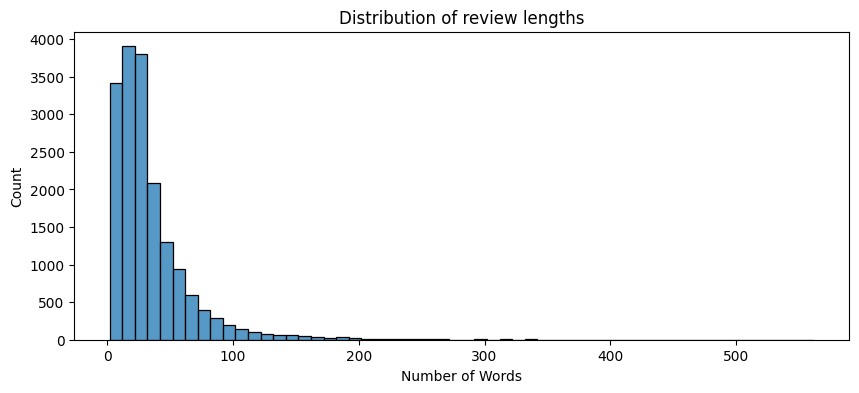

In [24]:
#Plot the distribution of review lengths
plt.figure(figsize=(10,4))
sns.histplot(data=df, x="Number of Words", binwidth=10)
plt.title("Distribution of review lengths");

In [25]:
#Convert the list containing the title lengths into a dataFrame
df2 = pd.DataFrame(data=title_length, columns=["Number of Words"])
#Let's view 5 random samples from the DataFrame
df2.sample(5)

,Number of Words
3714,2
13528,5
16593,3
13512,2
3213,10


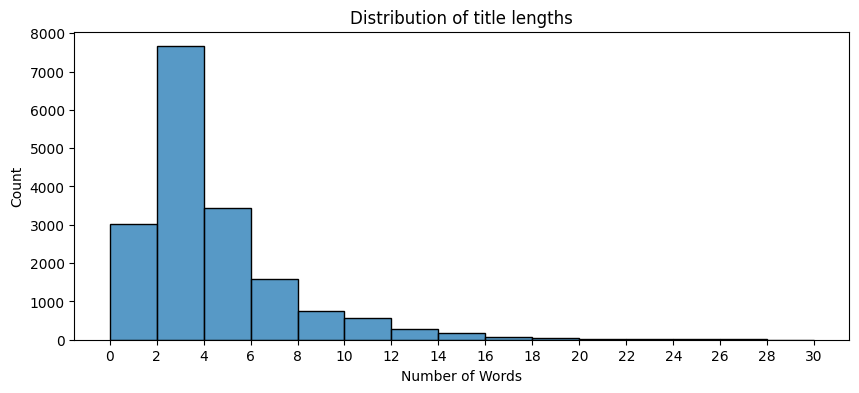

In [26]:
#Plot the distribution of title lengths
plt.figure(figsize=(10,4))
sns.histplot(data=df2, x="Number of Words", bins=range(0,max_title+5,2))
plt.title("Distribution of title lengths");
plt.xticks(range(0,max_title+5,2));

**We'll discard the reviews with title lengths smaller than 2.**

In [27]:
#Filter the reviews with title length smaller than 2.
dataset = dataset.filter(lambda x: len(x["review_title"].split()) > 2)

Filter:   0%|          | 0/17612 [00:00<?, ? examples/s]

Filter:   0%|          | 0/424 [00:00<?, ? examples/s]

Filter:   0%|          | 0/442 [00:00<?, ? examples/s]

## Model

For summarization task, we'll use [mT5-small](https://huggingface.co/google/mt5-small). For using this model, **sentencepiece** library is needed. So, we'll start by downloading it first.

In [28]:
#Install the sentencepiece
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.5 MB/s eta 0:00:00


In [29]:
#Instantiate the tokenizer
from transformers import AutoTokenizer

checkpoint = "google/mt5-small"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:470: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


**Before applying the tokenizer on the whole dataset, it is a best practice to try it on some sample f the data. That is exactly what we are going to do here. Let's apply the tokenzier on some toy data**

In [30]:
#Tokenize some input text (review)

#Extract the review
sample = dataset["train"][0]
sample

{'review_id': 'en_0789381',
 'product_id': 'product_en_0654248',
 'reviewer_id': 'reviewer_en_0360386',
 'stars': 4,
 'review_body': 'This an under reported portion of American history. The Revolutionary War was won. However the Indian tribes in the territory of Ohio, Indiana and Illinois were trying to hold onto land threatened by Americans wanting to move west. The newly formed United States did not a full time army, but Congress was finally persuaded to establish one and General Anthony Wayne was given command over the fledgling army and push the Indians further west.',
 'review_title': 'The U.S. Army is organized and Indians pushed further west.',
 'language': 'en',
 'product_category': 'digital_ebook_purchase'}

In [31]:
#Tokenize the extracted review
inputs = tokenizer(text=sample["review_body"])
inputs

{'input_ids': [1494, 461, 1711, 259, 39509, 259, 34427, 304, 6369, 12312, 260, 486, 63417, 3137, 4576, 639, 9048, 260, 259, 14833, 287, 11955, 92346, 299, 281, 287, 259, 149824, 304, 259, 43044, 261, 60438, 305, 59955, 2109, 6557, 347, 288, 14934, 66089, 6604, 259, 47544, 87891, 455, 6369, 263, 3007, 347, 288, 14201, 50470, 260, 486, 1546, 484, 259, 41525, 4248, 9629, 3031, 776, 259, 262, 3622, 1459, 259, 77724, 261, 1156, 26483, 639, 2733, 484, 117414, 285, 345, 288, 259, 76157, 1371, 305, 4724, 49270, 259, 70882, 639, 259, 12981, 40957, 910, 287, 8785, 345, 76625, 259, 77724, 305, 35005, 287, 11955, 263, 259, 17756, 50470, 260, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [32]:
#Convert the integer IDs to tokens
tokenizer.convert_ids_to_tokens(inputs["input_ids"])

['▁This',
 '▁an',
 '▁under',
 '▁',
 'reported',
 '▁',
 'portion',
 '▁of',
 '▁American',
 '▁history',
 '.',
 '▁The',
 '▁Revolution',
 'ary',
 '▁War',
 '▁was',
 '▁won',
 '.',
 '▁',
 'However',
 '▁the',
 '▁Indian',
 '▁trib',
 'es',
 '▁in',
 '▁the',
 '▁',
 'territory',
 '▁of',
 '▁',
 'Ohio',
 ',',
 '▁Indiana',
 '▁and',
 '▁Illinois',
 '▁were',
 '▁try',
 'ing',
 '▁to',
 '▁hold',
 '▁onto',
 '▁land',
 '▁',
 'threat',
 'ened',
 '▁by',
 '▁American',
 's',
 '▁want',
 'ing',
 '▁to',
 '▁move',
 '▁west',
 '.',
 '▁The',
 '▁new',
 'ly',
 '▁',
 'formed',
 '▁United',
 '▁States',
 '▁did',
 '▁not',
 '▁',
 'a',
 '▁full',
 '▁time',
 '▁',
 'army',
 ',',
 '▁but',
 '▁Congress',
 '▁was',
 '▁final',
 'ly',
 '▁persua',
 'd',
 'ed',
 '▁to',
 '▁',
 'establish',
 '▁one',
 '▁and',
 '▁General',
 '▁Anthony',
 '▁',
 'Wayne',
 '▁was',
 '▁',
 'given',
 '▁command',
 '▁over',
 '▁the',
 '▁fl',
 'ed',
 'gling',
 '▁',
 'army',
 '▁and',
 '▁push',
 '▁the',
 '▁Indian',
 's',
 '▁',
 'further',
 '▁west',
 '.',
 '</s>']

In [33]:
#Now, let's tokenize the review's title
target = tokenizer(text_target=sample["review_title"])
target

{'input_ids': [486, 581, 260, 399, 260, 259, 42777, 339, 4826, 345, 305, 11955, 263, 35005, 345, 259, 17756, 50470, 260, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [34]:
#Convert the integer IDs to tokens
tokenizer.convert_ids_to_tokens(target["input_ids"])

['▁The',
 '▁U',
 '.',
 'S',
 '.',
 '▁',
 'Army',
 '▁is',
 '▁organiz',
 'ed',
 '▁and',
 '▁Indian',
 's',
 '▁push',
 'ed',
 '▁',
 'further',
 '▁west',
 '.',
 '</s>']

**Since the tokenzier is working fine on the sampled data, we can apply it on the whole dataset**

In [35]:
max_input_length = 512
max_target_length = 30

#Define a function to tokenize the dataset
def tokenize_data_ftn(example):
    tokenized_data = tokenizer(text=example["review_body"],
                               max_length=max_input_length,
                               truncation=True)

    target = tokenizer(text_target=example["review_title"],
                       max_length=max_target_length,
                       truncation=True)

    tokenized_data["labels"] = target["input_ids"]

    return tokenized_data

In [36]:
#Apply the tokenization function on the whole dataset
tokenized_data = dataset.map(tokenize_data_ftn, batched=True)

Map:   0%|          | 0/9672 [00:00<?, ? examples/s]

Map:   0%|          | 0/238 [00:00<?, ? examples/s]

Map:   0%|          | 0/245 [00:00<?, ? examples/s]

In [37]:
#Remove the unnecessary column names
tokenized_dataset = tokenized_data.remove_columns(column_names=dataset["train"].column_names)

In [38]:
#Check the Dataset dict
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 9672
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 238
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 245
    })
})

## Model Fine-tuning

With our data ready, we can move on to fine-tuning the model.

In [39]:
#Instantiate the model
from transformers import TFAutoModelForSeq2SeqLM

model = TFAutoModelForSeq2SeqLM.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(
All model checkpoint layers were used when initializing TFMT5ForConditionalGeneration.

All the layers of TFMT5ForConditionalGeneration were initialized from the model checkpoint at google/mt5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFMT5ForConditionalGeneration for predictions without further training.


In [40]:
#Log in to the Hub account
from huggingface_hub import notebook_login

notebook_login()

In [41]:
#Instantiate the data collator
from transformers import DataCollatorForSeq2Seq

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer,
                                       model=model,
                                       return_tensors="tf")

**Again, I'd like to mention that it is a good practice to test any function on some sample data before applyig it to the whole dataset. That is, we will first apply the "data_collator" function on sample data to see how it performs. Then, if it works fine, we'll move with the whole dataset**

In [42]:
sample = [tokenized_dataset["train"][i] for i in range(3)]
data_collator(sample)

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


{'input_ids': <tf.Tensor: shape=(3, 108), dtype=int32, numpy=
array([[  1494,    461,   1711,    259,  39509,    259,  34427,    304,
          6369,  12312,    260,    486,  63417,   3137,   4576,    639,
          9048,    260,    259,  14833,    287,  11955,  92346,    299,
           281,    287,    259, 149824,    304,    259,  43044,    261,
         60438,    305,  59955,   2109,   6557,    347,    288,  14934,
         66089,   6604,    259,  47544,  87891,    455,   6369,    263,
          3007,    347,    288,  14201,  50470,    260,    486,   1546,
           484,    259,  41525,   4248,   9629,   3031,    776,    259,
           262,   3622,   1459,    259,  77724,    261,   1156,  26483,
           639,   2733,    484, 117414,    285,    345,    288,    259,
         76157,   1371,    305,   4724,  49270,    259,  70882,    639,
           259,  12981,  40957,    910,    287,   8785,    345,  76625,
           259,  77724,    305,  35005,    287,  11955,    263,    259,
  

**Everything's fine, we can move on to apply the data collator function on the whole dataset**

In [43]:
#Create the tf.data.Datasets object for training data / Apply the data_collator on the training data
tf_train_dataset = model.prepare_tf_dataset(dataset=tokenized_dataset["train"],
                                            collate_fn=data_collator,
                                            batch_size=8,
                                            shuffle=True)

#Create the tf.data.Datasets object for validation data / Apply the data_collator on the validation data
tf_validation_dataset = model.prepare_tf_dataset(dataset=tokenized_dataset["validation"],
                                                  collate_fn=data_collator,
                                                  batch_size=8,
                                                  shuffle=True)

#Create the tf.data.Datasets object for test data / Apply the data_collator on the test data
tf_test_dataset = model.prepare_tf_dataset(dataset=tokenized_dataset["test"],
                                            collate_fn=data_collator,
                                            batch_size=8,
                                            shuffle=False)

In [44]:
#Create optimizer
from transformers import create_optimizer
import tensorflow as tf

EPOCHS = 10
num_train_epochs = EPOCHS
num_train_steps = len(tf_train_dataset) * num_train_epochs

optimizer, schedule = create_optimizer(init_lr=5.6e-5,
                                       num_warmup_steps=0,
                                       num_train_steps=num_train_steps,
                                       weight_decay_rate=0.01)

In [45]:
#Compile the model
model.compile(optimizer=optimizer)

In [46]:
#Model summary
model.summary()

Model: "tfmt5_for_conditional_generation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 shared (Embedding)          multiple                  128057344 
                                                                 
 encoder (TFT5MainLayer)     multiple                  146940608 
                                                                 
 decoder (TFT5MainLayer)     multiple                  153236160 
                                                                 
 lm_head (Dense)             multiple                  128057344 
                                                                 
Total params: 300,176,768
Trainable params: 300,176,768
Non-trainable params: 0
_________________________________________________________________


In [49]:
#Define callbacks
from transformers.keras_callbacks import PushToHubCallback

callback = PushToHubCallback(output_dir="mt5-small-finetuned-en-and-es",
                             tokenizer=tokenizer)

Cloning https://huggingface.co/MUmairAB/mt5-small-finetuned-en-and-es into local empty directory.


In [ ]:
"""
You can un-comment the below code and run it if you run the above callback
code twice.
"""


"""
from huggingface_hub import delete_repo

#Delect the repo from the Hub
delete_repo(repo_id="mt5-small-finetuned-en-and-es")

#Delete the local cloned repo
!rm -rf mt5-small-finetuned-en-and-es
"""

In [50]:
#Train the model
history = model.fit(tf_train_dataset,
                    validation_data=tf_validation_dataset,
                    callbacks=[callback],
                    epochs=EPOCHS)

Epoch 1/10
1209/1209 [==============================] - ETA: 0s - loss: 9.8080

Adding files tracked by Git LFS: ['tokenizer.json']. This may take a bit of time if the files are large.


1209/1209 [==============================] - 452s 346ms/step - loss: 9.8080 - val_loss: 4.2830
Epoch 2/10
1209/1209 [==============================] - 572s 473ms/step - loss: 5.9101 - val_loss: 3.8003
Epoch 3/10
1209/1209 [==============================] - 574s 475ms/step - loss: 5.1453 - val_loss: 3.6062
Epoch 4/10
1209/1209 [==============================] - 584s 483ms/step - loss: 4.7005 - val_loss: 3.5052
Epoch 5/10
1209/1209 [==============================] - 578s 478ms/step - loss: 4.4095 - val_loss: 3.4904
Epoch 6/10
1209/1209 [==============================] - 590s 488ms/step - loss: 4.2204 - val_loss: 3.3996
Epoch 7/10
1209/1209 [==============================] - 615s 509ms/step - loss: 4.0501 - val_loss: 3.3842
Epoch 8/10
1209/1209 [==============================] - 595s 492ms/step - loss: 3.9260 - val_loss: 3.3963
Epoch 9/10
1209/1209 [==============================] - 592s 490ms/step - loss: 3.8527 - val_loss: 3.3267
Epoch 10/10
1209/1209 [==============================] - 

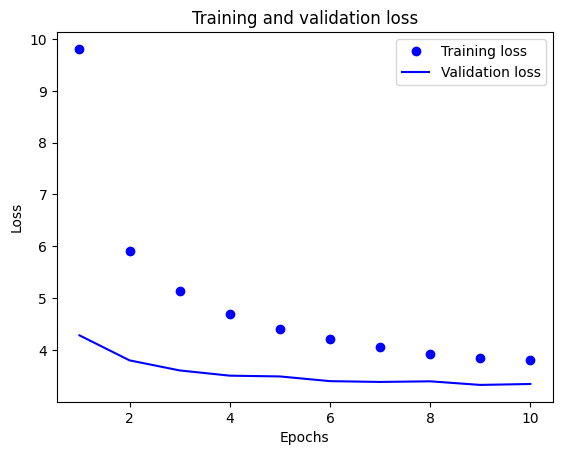

In [51]:
# Plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Model Evaluation

**Just like any machine generation task, the summarization task is evaluated on ROUGE metric. We'll use the evaluate library to compute the ROUGE metric.**

**This metric does not take the tokenized sentences, rather accepts the complete sentences.**

**So, to evaluate the model, we can write a method that will accept the test dataset and apply the model to get the translated text and then compute the ROUGE score.**

**We will wrap this method in @tf.function to compiling it with XLA by passing jit_compile=True as argument. This will increase the processing speed.**

In [53]:
#Install the ROUGE library
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=20ae10467f18deb106f2bf02fdd290566d8e486a362ffac2f8ef6ec73725c4c5
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [54]:
#Install the evaluate library
!pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 1.7 MB/s eta 0:00:00


In [55]:
#Load the ROUGE metric
import evaluate

rouge_score = evaluate.load("rouge")

In [56]:
#Install the NLTK library
!pip install nltk

In [57]:
#download the punctuation rules
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [58]:
from nltk.tokenize import sent_tokenize

In [59]:
import numpy as np
import tensorflow as tf
#We'll use the tqdm to monitor the processing speed
from tqdm import tqdm

#Instantiate the data collator
test_data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer,
                                                  model=model,
                                                  return_tensors="tf",
                                                  pad_to_multiple_of=128)

#Generate the tf.data.Dataset object
tf_test_dataset = model.prepare_tf_dataset(tokenized_dataset["test"],
                                           collate_fn=test_data_collator,
                                           shuffle=False,
                                           batch_size=8,
                                           drop_remainder=True)

#Wrap the function in tf.function
@tf.function(jit_compile=True)
def test_with_xla(batch):
    return model.generate(input_ids=batch["input_ids"],
                          attention_mask=batch["attention_mask"],
                          max_new_tokens=32)

all_preds = []
all_labels = []

#Use tqdm to get the progress bar
for batch, labels in tqdm(tf_test_dataset):

    #Translate the text
    predictions = test_with_xla(batch)

    #Convert the tokens into words
    decoded_preds = tokenizer.batch_decode(predictions,
                                            skip_special_tokens=True)
    #Convert the label IDs to NumPy array
    labels = labels.numpy()

    #Replace the -100 tokens with pad_token_id (here, 0)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    #np.where does the following
    # new_labels = []
    # for label in labels:
    #     if label!=100:
    #         new_labels.append(label)
    #     else:
    #         new_labels.append(tokenizer.pad_token_id)

    #Decode the labels
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    #Remove all unncessary spaces
    decoded_preds = ["\n".join(sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(sent_tokenize(label.strip())) for label in decoded_labels]

    #Since we are dealing with batches of data, we are using "extend()"
    # method, not the "append()"
    # "extend()" will iterate over the batch and then add
    # each element of the iterable to the end of the List
    all_preds.extend(decoded_preds)
    all_labels.extend(decoded_labels)

100%|██████████| 30/30 [02:02<00:00,  4.09s/it]


In [60]:
#Calculate the ROUGE score
result = rouge_score.compute(predictions=decoded_preds,
                             references=decoded_labels,
                             use_stemmer=True)

In [63]:
#Print the score
for key, value in result.items():
    print(f">> '{key}': {round(value*100,2)}")

{'rouge1': 0.29166666666666663,
 'rouge2': 0.25,
 'rougeL': 0.29166666666666663,
 'rougeLsum': 0.29166666666666663}

In [64]:
#Let's pretify the results
for key, value in result.items():
    print(f">> '{key}': {round(value*100,2)}")

>> 'rouge1': 29.17
>> 'rouge2': 25.0
>> 'rougeL': 29.17
>> 'rougeLsum': 29.17


**We have got a pretty impressive ROUGE score.**